In [10]:
#import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
import sys

In [116]:
#to set up the current directory for input car dataset
#place car.data file under the same dir where this .ipynb file is placed.
__location__ = os.path.realpath(os.getcwd())
for dirname, _, filenames in os.walk(__location__):
    for filename in filenames:
        if filename == 'car.data':
            input_data = os.path.join(dirname, filename)
print(input_data)


c:\Users\bupadhy\OneDrive - Lowe's Companies Inc\Documents\DataScience\car.data


In [22]:
#reading the dataset using pandas
cars_df = pd.read_csv(input_data)
print(cars_df.shape)

(1727, 7)


In [23]:
#assigning columns to our inpput car dataset df
cars_df.columns = ['buying', 'maint', 'doors','persons','lugboot','safety','evaluation']

In [26]:
#visualizing input dataset
cars_df.head()

,buying,maint,doors,persons,lugboot,safety,evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [27]:
#check for null shells
cars_df.isnull().sum()


buying        0
maint         0
doors         0
persons       0
lugboot       0
safety        0
evaluation    0
dtype: int64

In [28]:
#analytical look at our dataset
cars_df.describe()

,buying,maint,doors,persons,lugboot,safety,evaluation
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,more,big,high,unacc
freq,432,432,432,576,576,576,1209


In [29]:
cars_df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lugboot', 'safety',
       'evaluation'],
      dtype='object')

In [30]:
#the number of cars in each evaluation category in the given input dataset
cars_df['evaluation'].value_counts().sort_index()

acc       384
good       69
unacc    1209
vgood      65
Name: evaluation, dtype: int64

In [31]:
#visualizing input dataset 
# the mapping is based on the result obtained above
#acc : 384 , good: 69 , unacc : 1209 , vgood : 65
fig = {
   "data": [
    {
      "values": [1209,384,69,65],
      "labels": [
        "Unacceptable",
        "Acceptable",
        "Good",
        "Very Good"
      ],
      "domain": {"column": 0},
      "name": "Car Evaluation",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Distribution of Evaluated Cars",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)

In [32]:
# cleaning the input data to numeric format wherever needed
cars_df.doors.replace(('5more'),('5'),inplace=True)
cars_df.persons.replace(('more'),('5'),inplace=True)

In [53]:
#collecting the features of the input dataset
features = cars_df.iloc[:,:-1]
features.iloc[:10,:]
a = []
for i in features:
    a.append(features[i].value_counts())
a[0].index

Index(['high', 'med', 'low', 'vhigh'], dtype='object')

In [46]:
#correlation among all the variables from input dataset
buy = pd.crosstab(cars_df['buying'], cars_df['evaluation'])
mc = pd.crosstab(cars_df['maint'], cars_df['evaluation'])
drs = pd.crosstab(cars_df['doors'], cars_df['evaluation'])
prsn = pd.crosstab(cars_df['persons'], cars_df['evaluation'])
lb = pd.crosstab(cars_df['lugboot'], cars_df['evaluation'])
sfty = pd.crosstab(cars_df['safety'], cars_df['evaluation'])

In [48]:
buy

evaluation,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,359,0


In [51]:
#correlation of buying feature vs Evaluation
#x : feature a[0]
#y : buy = pd.crosstab(cars_df['buying'], cars_df['evaluation'])
data = [
    go.Bar(
        x=a[0].index, 
        y=buy['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a[0].index,
        y=buy['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a[0].index,
        y=buy['good'],
        name='Good'
    ),
    go.Bar(
        x=a[0].index,
        y=buy['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Selling Price vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [54]:
#correlation of maintenance feature vs Evaluation
#x : feature a[1]
#y : mc = pd.crosstab(cars_df['maint'], cars_df['evaluation'])
data = [
    go.Bar(
        x=a[1].index, 
        y=mc['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a[1].index,
        y=mc['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a[1].index,
        y=mc['good'],
        name='Good'
    ),
    go.Bar(
        x=a[1].index,
        y=mc['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Maintainance cost vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [55]:
#correlation of Doors feature vs Evaluation
#x : feature a[2]
#y :  drs = pd.crosstab(cars_df['doors'], cars_df['evaluation'])
data = [
    go.Bar(
        x=a[2].index, 
        y=drs['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a[2].index,
        y=drs['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a[2].index,
        y=drs['good'],
        name='Good'
    ),
    go.Bar(
        x=a[2].index,
        y=drs['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Doors vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [56]:
#correlation of Person feature vs Evaluation
#x : feature a[3]
#y :  prsn = pd.crosstab(cars_df['persons'], cars_df['evaluation'])
data = [
    go.Bar(
        x=a[3].index, 
        y=prsn['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a[3].index,
        y=prsn['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a[3].index,
        y=prsn['good'],
        name='Good'
    ),
    go.Bar(
        x=a[3].index,
        y=prsn['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Number of Passengers vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [57]:
#correlation of Luggage Boot feature vs Evaluation
#x : feature a[4]
#y : lb = pd.crosstab(cars_df['lugboot'], cars_df['evaluation'])
data = [
    go.Bar(
        x=a[4].index, 
        y=lb['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a[4].index,
        y=lb['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a[4].index,
        y=lb['good'],
        name='Good'
    ),
    go.Bar(
        x=a[4].index,
        y=lb['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Luggage Boot vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [58]:
#correlation of Luggage Boot feature vs Evaluation
#x : feature a[5]
#y : sfty = pd.crosstab(cars_df['safety'], cars_df['evaluation'])
data = [
    go.Bar(
        x=a[5].index, 
        y=sfty['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a[5].index,
        y=sfty['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a[5].index,
        y=sfty['good'],
        name='Good'
    ),
    go.Bar(
        x=a[5].index,
        y=sfty['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Safety vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [185]:
#Dividing the dataframe into x features and y target variable
x = cars_df.iloc[:, :-1]
y = cars_df.iloc[:, 6]
y.columns = ['evaluation']

In [186]:
#Using pandas dummies function to encode the data into categorical data
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
x.head()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5,persons_4,persons_5,lugboot_med,lugboot_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [187]:
y.describe()

count      1727
unique        4
top       unacc
freq       1209
Name: evaluation, dtype: object

In [188]:
#preparing feature and label data set
x=x.values
y=y.values

In [189]:
y[:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [190]:
#split of input data set into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [191]:
y_train[:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [192]:
x_train[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [196]:
#importing sklearn module for logistic regression model as classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [197]:
# training our model with training dataset
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
# 10 fold cross validation on Trainig Data
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(lr_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.891 (0.021)


In [199]:
x_test[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [200]:
#testing our model by predicting against testing data
y_pred = lr_model.predict(x_test)

In [201]:
#classification report creation
#training and testing accuracy
#f1 score : decision boundary
#confusion matrix
f1_lr=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: {:.2f} % ".format(lr_model.score(x_train, y_train)*100))
print("Testing Accuracy: {:.2f} %".format(lr_model.score(x_test, y_test)*100))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))  

Training Accuracy: 90.81 % 
Testing Accuracy: 88.89 %
[[ 83   3  10   0]
 [  7   6   0   5]
 [ 16   0 282   0]
 [  7   0   0  13]]
              precision    recall  f1-score   support

         acc       0.73      0.86      0.79        96
        good       0.67      0.33      0.44        18
       unacc       0.97      0.95      0.96       298
       vgood       0.72      0.65      0.68        20

    accuracy                           0.89       432
   macro avg       0.77      0.70      0.72       432
weighted avg       0.89      0.89      0.89       432



In [154]:
## creating another LR model this time with label encoding of our training data set
from sklearn.preprocessing import LabelEncoder

x_new = cars_df.iloc[:,:-1]
y_new = cars_df.iloc[:, 6:]
y_new.columns = ['evaluation']


lae = LabelEncoder()
x_new=x_new.apply(lambda col: lae.fit_transform(col))
y_new=y_new.apply(lambda col: lae.fit_transform(col))
x_new.head()

,buying,maint,doors,persons,lugboot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [155]:
y_new.head()

,evaluation
0,2
1,2
2,2
3,2
4,2


In [156]:
x_new=x_new.values
y_new=y_new.values

In [177]:
# creating new training and testing feature dataset
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new,y_new, test_size = 0.25, random_state = 0)

In [178]:
# for multifeature space:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train_new = pca.fit_transform(x_train_new)
x_test_new = pca.fit_transform(x_test_new)

In [179]:
# training a new Logistic regression model
lr_new = LogisticRegression(random_state=0)
lr_new.fit(x_train_new, y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
#testing our new model by predicting against testing data
y_pred_new = lr_new.predict(x_test_new)

In [181]:
#classification report creation
#training and testing accuracy
#f1 score : decision boundary
#confusion matrix
f1_lr=f1_score(y_test_new,y_pred_new, average='macro')
print("Training Accuracy: {:.2f} % ".format(lr_new.score(x_train_new, y_train_new)*100))
print("Testing Accuracy: {:.2f} %".format(lr_new.score(x_test_new, y_test_new)*100))
cm = confusion_matrix(y_test_new, y_pred_new)
print(cm)
print(classification_report(y_test_new,y_pred_new))  

Training Accuracy: 70.35 % 
Testing Accuracy: 68.98 %
[[  0   0  96   0]
 [  0   0  18   0]
 [  0   0 298   0]
 [  0   0  20   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00        18
           2       0.69      1.00      0.82       298
           3       0.00      0.00      0.00        20

    accuracy                           0.69       432
   macro avg       0.17      0.25      0.20       432
weighted avg       0.48      0.69      0.56       432



In [125]:
###Predict and display the class label of a car with following attributes : 
###buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med]

# preparing the input data for prediction
pred_df = pd.DataFrame([['vhigh','low',4,'more','small','med']])
pred_df.columns = ['buying', 'maint', 'doors','persons','lugboot','safety']
#pred_df.doors.replace(('5more'),('5'),inplace=True)
pred_df.persons.replace(('more'),('5'),inplace=True)
pred_df


,buying,maint,doors,persons,lugboot,safety
0,vhigh,low,4,5,small,med


In [143]:
#Using label encoder to encode the data into categorical data
lae = LabelEncoder()
new=pred_df.apply(lambda col: lae.fit_transform(col))
new.head()

,buying,maint,doors,persons,lugboot,safety
0,0,0,0,0,0,0


In [148]:
# predict the label  of the car with feature attributes :
# buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med]  
class_lab = lr_new.predict(new)
print(f'the car can be labeled as : {class_lab[0]}')

the car can be labeled as : unacc


In [149]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
#hot encoding for training output


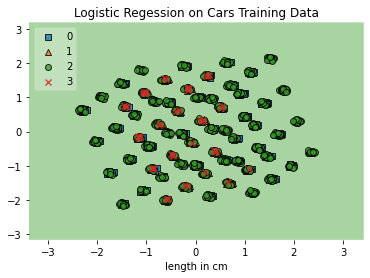

In [183]:
#decision boundary on training data set
y_train_new = y_train_new.reshape(1295,)
plot_decision_regions(x_train_new,y_train_new.astype(np.integer), clf=lr_new, legend=2)
plt.xlabel('length in cm')
plt.title('Logistic Regession on Cars Training Data')
plt.show()